# Pre-processing and Creating Training Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
diabetes_cleaned = pd.read_csv(r'C:\Users\ashle\OneDrive\Documents\GitHub\Capstone-2\Diabetes_Class_Cleaned.csv', index_col=0)

In [3]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cholesterol      390 non-null    int64  
 1   Glucose          390 non-null    int64  
 2   HDL Chol         390 non-null    int64  
 3   Chol/HDL ratio   390 non-null    float64
 4   Age              390 non-null    int64  
 5   Gender           390 non-null    object 
 6   Height           390 non-null    int64  
 7   Weight           390 non-null    int64  
 8   BMI              390 non-null    float64
 9   Systolic BP      390 non-null    int64  
 10  Diastolic BP     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  Waist/hip ratio  390 non-null    float64
 14  Diabetes         390 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 48.8+ KB


### Create dummy features:

In [4]:
diabetes_cleaned['Diabetes'].unique()

array(['No diabetes', 'Diabetes'], dtype=object)

In [5]:
diabetes_cleaned['Diabetes'].replace('Diabetes', 1, inplace=True)
diabetes_cleaned['Diabetes'].replace('No diabetes', 0, inplace=True)

In [6]:
diabetes_cleaned.head()

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
Patient number,,,,,,,,,,,,,,,
1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0
2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,0
3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,0
4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,0
5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,0


In [7]:
diabetes_cleaned = pd.get_dummies(diabetes_cleaned)

In [8]:
class_counts = diabetes_cleaned['Diabetes'].value_counts()
class_counts

0    330
1     60
Name: Diabetes, dtype: int64

In [9]:
class_percentages = pd.Series([(x / diabetes_cleaned.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    84.615385
1    15.384615
dtype: float64

### Standardize the data:

In [10]:
scaler = preprocessing.StandardScaler()
columns = diabetes_cleaned.columns

In [11]:
scaled_df = scaler.fit_transform(diabetes_cleaned) 
scaled_df = pd.DataFrame(scaled_df, columns=columns)

### Train and test data:

In [12]:
y=scaled_df.pop('Diabetes')
y = y.astype(str)
X=scaled_df
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 42)

# Modeling

### Model 1: Entropy Model

In [13]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=42)

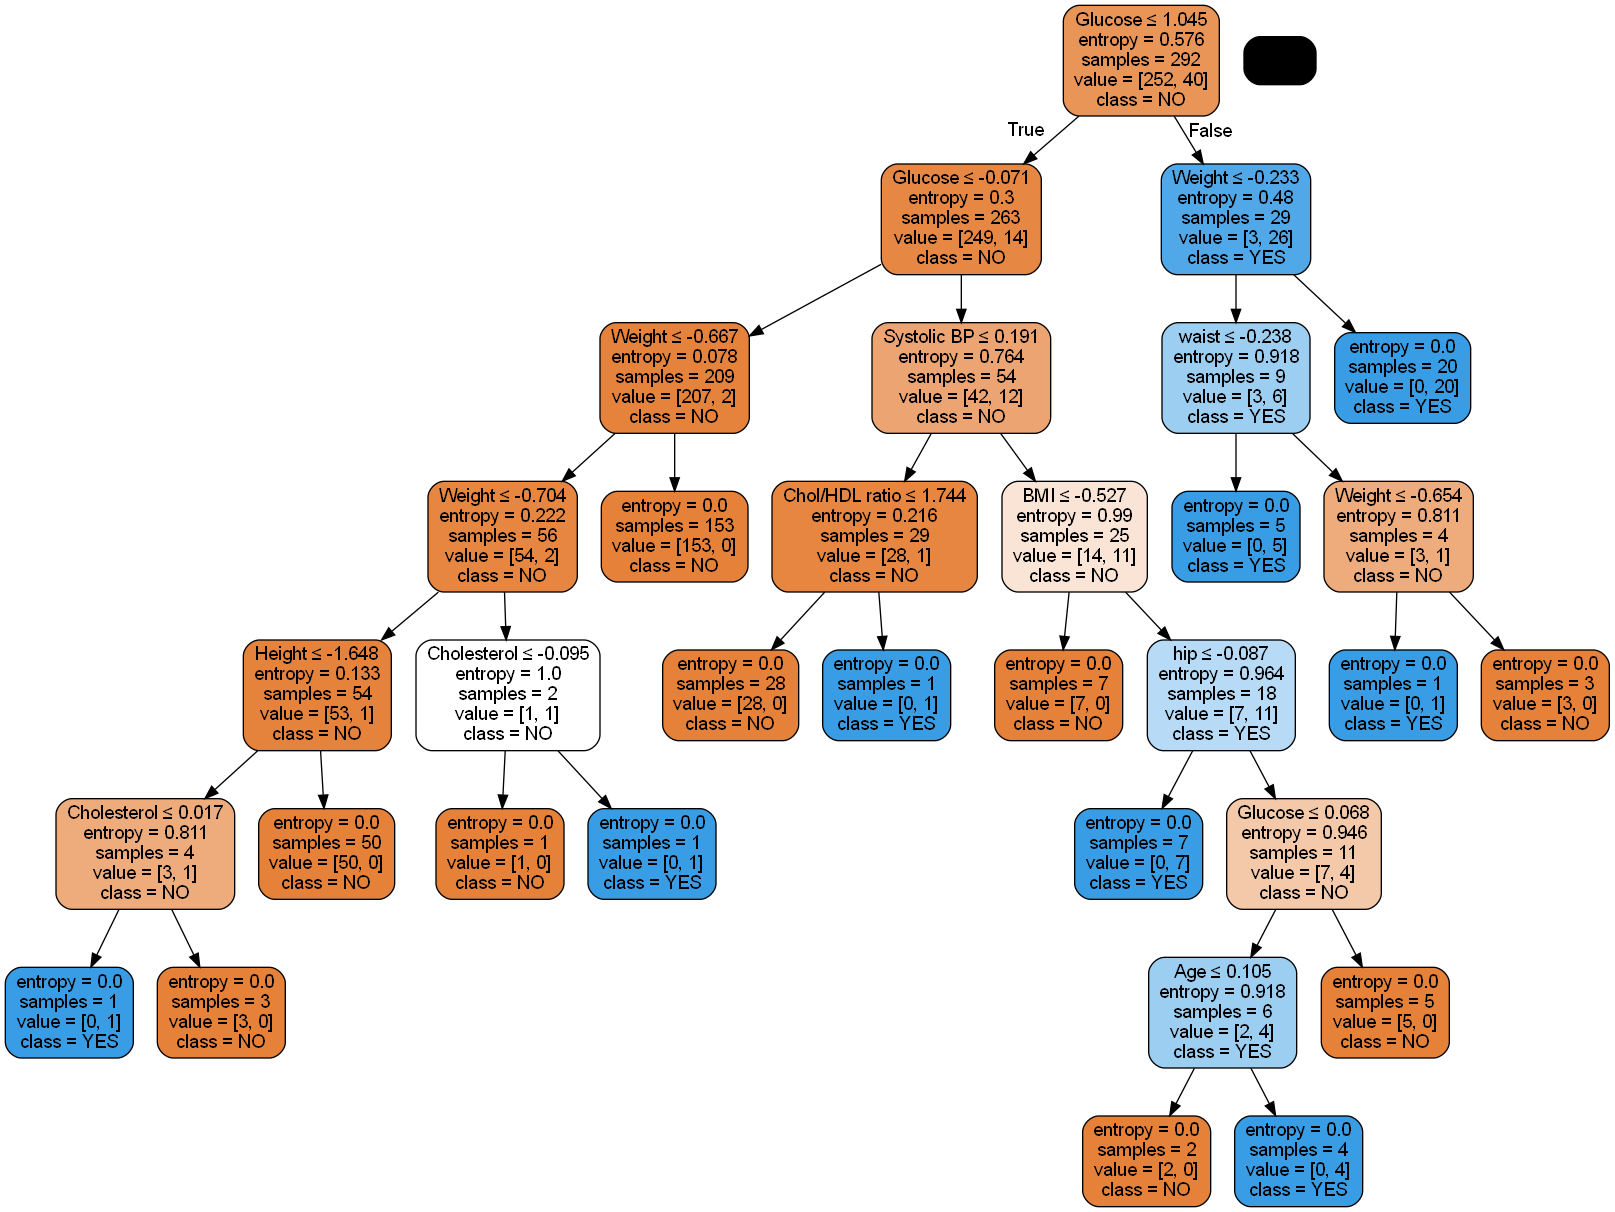

In [14]:
dot_data = StringIO()

tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [19]:
from sklearn.metrics import confusion_matrix

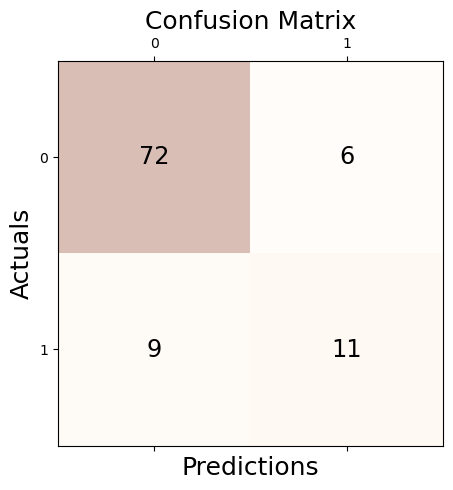

In [20]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Model Stats:

In [28]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("F1 Score:", metrics.F1_score(y_test,y_pred))

Model Entropy - no max depth
Accuracy: 0.8775510204081632


ValueError: pos_label=1 is not a valid label. It should be one of ['-0.42640143271122094', '2.345207879911715']

### Model 2: Gini Model

In [ ]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state=42)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)
gini_model

In [ ]:
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
print("Gini impurity model - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

### Model 3: Entropy Model Max Depth 2

In [ ]:
entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth = 2)
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model2

In [ ]:
dot_data = StringIO()

tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
print("Model Entropy - Max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

### Model 4: Gini Model Max Depth 2

In [23]:
gini_model2 = tree.DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=2)

gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)
gini_model2

DecisionTreeClassifier(max_depth=2, random_state=42)

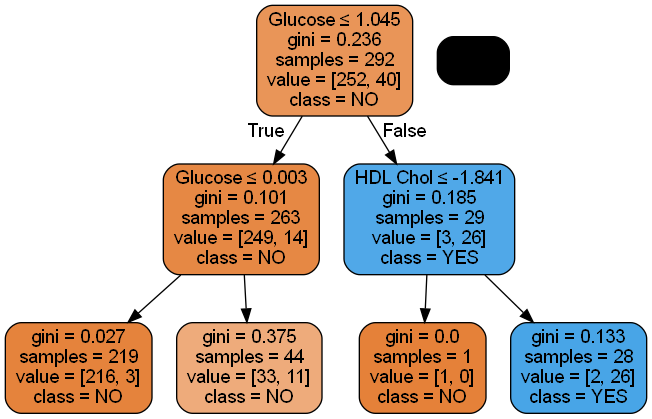

In [24]:
dot_data = StringIO()
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
print("Gini impurity  model - max depth 2")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Gini impurity  model - max depth 2
Accuracy: 0.8775510204081632


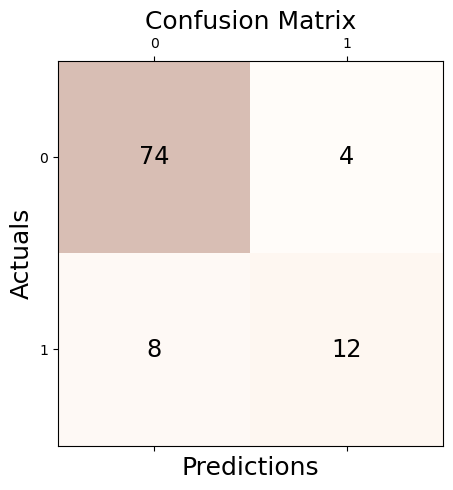

In [26]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()